In [5]:
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [21]:
lats=np.random.uniform(low=-90, high=90,size=10)
temp=np.random.uniform(low=-32, high=50,size=10)

In [20]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]


In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.04x + 74.81
The p-value is: 0.724


In [23]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

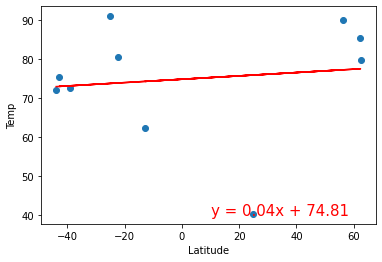

In [24]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [31]:
%store -r city_data_df
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Adana,TR,2023-08-01 17:19:33,36.9850,35.2881,84.72,74,40,8.05
1,Kodinsk,RU,2023-08-01 17:19:34,58.6881,99.1844,62.38,95,4,1.19
2,Cidreira,BR,2023-08-01 17:19:34,-30.1811,-50.2056,68.88,71,7,7.02
3,Kariba,ZW,2023-08-01 17:19:35,-16.5167,28.8000,73.18,44,63,5.03
4,Deputatskiy,RU,2023-08-01 17:19:35,69.3000,139.9000,36.68,94,61,3.02
...,...,...,...,...,...,...,...,...,...
286,Aswan,EG,2023-08-01 17:27:00,24.0934,32.9070,103.30,16,0,9.22
287,Mayo,US,2023-08-01 17:27:00,38.8876,-76.5119,81.50,57,0,8.05
288,El Ocotito,MX,2023-08-01 17:27:01,17.2500,-99.5667,76.05,87,100,0.67
289,Machaneng,BW,2023-08-01 17:27:01,-23.1862,27.4886,63.23,26,0,11.68


In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Adana,TR,2023-08-01 17:19:33,36.9850,35.2881,84.72,74,40,8.05
1,Kodinsk,RU,2023-08-01 17:19:34,58.6881,99.1844,62.38,95,4,1.19
4,Deputatskiy,RU,2023-08-01 17:19:35,69.3000,139.9000,36.68,94,61,3.02
5,Pulawy,PL,2023-08-01 17:19:35,51.4166,21.9694,68.72,57,100,7.58
6,Ashta,IN,2023-08-01 17:19:36,23.0167,76.7167,75.99,87,44,13.13


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

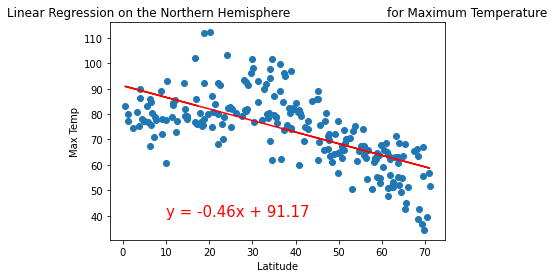

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


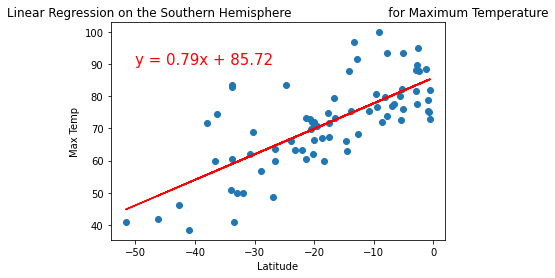

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

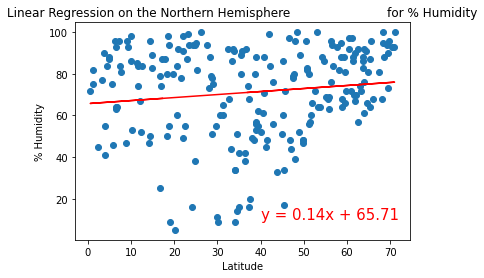

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

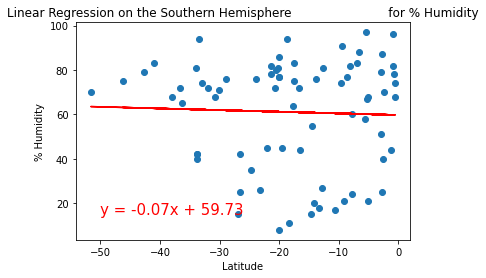

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))